In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import scipy.optimize as opt
import generate as FE

In [2]:
#VALUES IN KPL (switched from mpg)
FEgen = FE.Generator("pvt_FE.csv")
busFEgen = FE.Generator("bus_FE.csv")

In [3]:
##Code to create plot_df, downselected from EPA FE data for model year 2018. This code isn't needed as long as the filtered_FE.csv file exists


# epa_df = pd.read_csv("/Users/dweigl/Documents/Projects/ACES/FE Data/EPA_AutomotiveTrends.csv")
# list(epa_df[epa_df['Model Year']=="2018"]['Vehicle Type'])
# veh_list = ['Sedan/Wagon',
#  'Truck SUV',
#  'Pickup',
#  'Car SUV',
#  'Minivan/Van']

# plot_df = epa_df[(epa_df['Model Year']=="2018") & (epa_df['Vehicle Type'].isin(veh_list))][['Vehicle Type','Production Share','Real-World FE']].set_index('Vehicle Type',drop=True)
# plot_df['FE'] = plot_df['Real-World FE'].round(1)
# plot_df.drop('Real-World FE',axis = 1,inplace=True)

#Get integer frequency values to later create distribution
# plot_df = plot_df.sort_values('FE')
# plot_df['freq'] = plot_df['Production Share'] * 100
# plot_df.freq = round(plot_df.freq,0)
# plot_df['freq'] = plot_df['freq'].astype(int)

#plot_df.to_csv("./filtered_FE.csv")

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text yticklabel objects>)

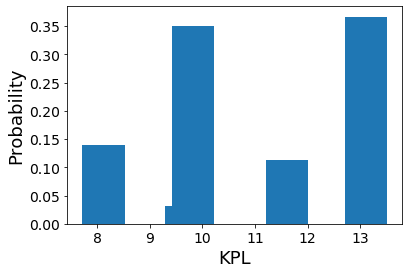

In [4]:
#View initial distribution
fig = plt.figure()
ax = plt.axes()
plot_df = FEgen.FE_df

x = np.linspace(0, 10, 1000)
ax.bar(plot_df['kpl'],plot_df['Production Share'])
plt.xlabel('KPL',size=18)
plt.ylabel('Probability',size=18)
plt.xticks(size=14)
plt.yticks(size=14)

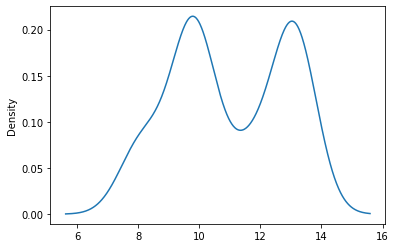

In [5]:
#KDE plot documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html

FEgen.FE_series.plot.kde()

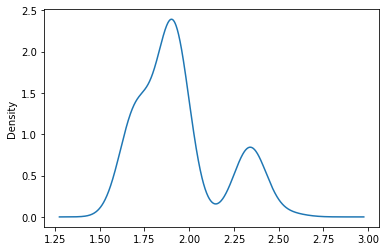

In [6]:
busFEgen.FE_series.plot.kde()

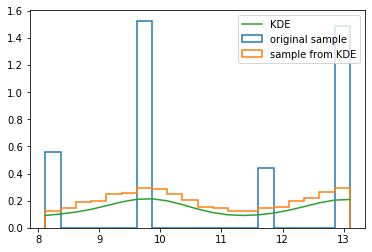

In [7]:
#Code from here: https://stackoverflow.com/questions/35434363/python-generate-random-values-from-empirical-distribution

sample_pdf = FEgen.FE_pdf

# Sample new datapoints from the KDE
new_sample_data = sample_pdf.resample(10000).T[:,0]

# Histogram of initial empirical sample
cnts, bins, p = plt.hist(FEgen.FE_series, label='original sample', bins=20,
                         histtype='step', linewidth=1.5, density=True)

# Histogram of datapoints sampled from KDE
plt.hist(new_sample_data, label='sample from KDE', bins=bins,
         histtype='step', linewidth=1.5, density=True)

# Visualize the kde itself
y_kde = sample_pdf(bins)
plt.plot(bins, y_kde, label='KDE')
plt.legend()
plt.show(block=False)

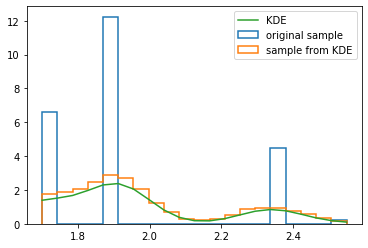

In [8]:
#Code from here: https://stackoverflow.com/questions/35434363/python-generate-random-values-from-empirical-distribution

sample_pdf = busFEgen.FE_pdf

# Sample new datapoints from the KDE
new_sample_data = sample_pdf.resample(10000).T[:,0]

# Histogram of initial empirical sample
cnts, bins, p = plt.hist(busFEgen.FE_series, label='original sample', bins=20,
                         histtype='step', linewidth=1.5, density=True)

# Histogram of datapoints sampled from KDE
plt.hist(new_sample_data, label='sample from KDE', bins=bins,
         histtype='step', linewidth=1.5, density=True)

# Visualize the kde itself
y_kde = sample_pdf(bins)
plt.plot(bins, y_kde, label='KDE')
plt.legend()
plt.show(block=False)

In [9]:
#To generate 100 samples from FE distribution:
FEgen.generate(100)

array([[10.09609147, 13.35032703, 13.06734663,  7.58577586, 10.75420845,
        11.01529698,  9.81254411, 12.54875629,  9.86160993, 13.30685876,
        12.79115079, 10.37305102, 11.94328328, 13.74227807, 10.50273475,
        10.22763627, 11.92142445, 12.76882352,  7.58990121,  9.16333922,
        13.50332462, 11.836228  , 12.778724  , 10.12565762,  9.11151872,
         9.33574175, 12.18219808, 11.73535654, 13.01229756,  7.73525024,
         9.94841873,  7.42920481, 12.44401499, 13.89623067,  6.81329731,
        12.98971102, 10.15369482,  7.44956511, 13.58445721, 13.12308769,
         9.16485674, 12.7454939 , 13.00215559, 13.10371081, 10.44325443,
        13.15267617,  7.25264748, 13.44821088, 14.44278578, 13.89734792,
        10.66639611, 12.54443721, 12.12137683,  9.53597844, 13.02584116,
        10.13544918, 12.55223886,  7.65469399, 13.19049304, 12.91321097,
        13.22878865, 15.17437276, 13.09489069, 12.77267092, 11.38106232,
        13.77539825, 12.96682628,  9.62620521,  9.3

In [10]:
#To generate 100 samples from FE distribution:
busFEgen.generate(100)

array([[2.29133126, 2.06385138, 2.05143444, 2.04314658, 1.62617131,
        1.93190364, 2.25643562, 1.84901687, 1.82169002, 2.42664995,
        2.40704009, 2.13022201, 1.8504384 , 1.59548627, 1.96172783,
        2.26435621, 1.8949164 , 1.94328662, 1.91820951, 1.65583228,
        1.605603  , 1.73208253, 2.33752685, 2.25370597, 1.68039617,
        1.6339468 , 1.90806276, 1.8270682 , 1.87619402, 2.15753936,
        1.91584727, 1.89503265, 1.56608814, 1.6423332 , 1.88174789,
        1.67978157, 2.2806362 , 2.37863548, 1.81678106, 1.9283649 ,
        1.4635971 , 1.80080803, 1.84429714, 1.62532564, 1.77381785,
        1.99275925, 1.5806264 , 1.94067948, 1.60513611, 1.83462855,
        1.91532098, 1.94744008, 1.71930266, 2.32082216, 2.32066804,
        1.9684465 , 1.73659363, 1.78142838, 1.96281344, 1.71195932,
        2.26620154, 1.89476239, 1.8029125 , 1.83546321, 1.74844763,
        1.90290226, 1.88387759, 1.75211976, 1.75959251, 1.61802826,
        1.83601458, 1.84735668, 1.73289128, 1.65